<a href="https://colab.research.google.com/github/mohfaiz-123/Faizaan.github.io/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
# Analyze the dataset
dir(iris)
iris.frame
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# convert dataset in to dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
#print row number 9 to 12 from the dataframe
df[9:12]
df['target']=iris.target
df
df[df.target==2].head()
df['flowername']=df.target.apply(lambda x: iris.target_names[x])
df
from sklearn.model_selection import train_test_split
x=df.drop(['target','flowername'],axis='columns')
y=df.target


In [ ]:
# split dataset in to 80:20 ratio for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_test)

30

In [ ]:
# implement k -neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)

In [ ]:
# train the model
knn.fit(x_train, y_train)
KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Calculate score of the model
knn.score(x_test, y_test)

0.9333333333333333

In [ ]:
# some random prediction
knn.predict([[4.8,3.0,1.5,0.3]])
# create confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ 6,  0,  0],
       [ 0, 13,  1],
       [ 0,  1,  9]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.93      0.93        14
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



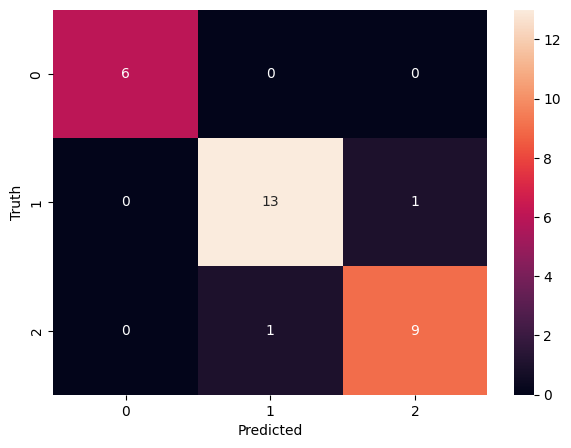

In [ ]:
# create heatmap
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))